<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/Nov_23_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random

# Function to read an existing CSV file and return its data as a list of dictionaries
def read_existing_csv(file_name):
    data = []
    with open(file_name, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

# Function to generate additional data or entries
def generate_new_entries(existing_data, num_entries_to_add):
    new_data = []
    for i in range(num_entries_to_add):
        # You can create your own logic to generate new entries here.
        # For this example, we'll simply copy existing entries.
        new_entry = existing_data[i % len(existing_data)].copy()
        new_entry['Serial No.'] = str(len(existing_data) + i + 1)  # Updating the Serial No. for the new entry
        new_data.append(new_entry)
    return new_data

# Function to write the combined data to a new CSV file
def write_combined_data(file_name, combined_data):
    with open(file_name, mode='w', newline='') as file:
        fieldnames = combined_data[0].keys()
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(combined_data)

if __name__ == "__main__":
    existing_csv_file = "Admission_Predict.csv"
    new_csv_file = "new_data.csv"
    num_entries_to_add = 2000

    # Step 1: Read the existing CSV file
    existing_data = read_existing_csv(existing_csv_file)

    # Step 2: Generate new entries
    new_entries = generate_new_entries(existing_data, num_entries_to_add)

    # Step 3: Combine the existing and new data
    combined_data = existing_data + new_entries

    # Step 4: Write the combined data to a new CSV file
    write_combined_data(new_csv_file, combined_data)

    print(f"{num_entries_to_add} new entries have been added to {new_csv_file}.")


2000 new entries have been added to new_data.csv.


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

<Axes: >

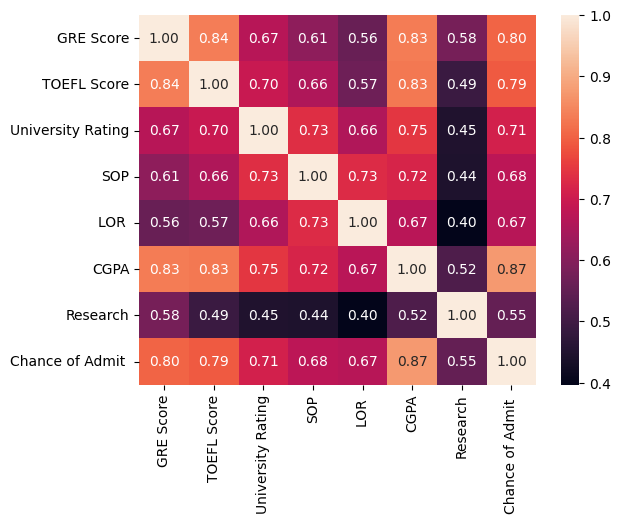

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('new_data.csv')
df.head(10)

# Assigning the list of columns from the dataset
numericColumns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Creating a correlation matrix
correlationMatrix = df.loc[:, numericColumns].corr()

# Printing the correlation matrix
print(correlationMatrix)

# Displaying the correlation matrix with two decimal places
sns.heatmap(correlationMatrix, annot=True, fmt='.2f')  # Use fmt='.2f' to display two decimal places


1.  Loads a dataset from a CSV file named  
    'custom_data_correlated.csv' using Pandas.

2.  Defines a list of numeric column names to work with.

3.  Calculates a correlation matrix for the specified
    numeric columns. The correlation matrix shows how each numeric column is related to every other numeric column in the dataset.

4.  Prints the correlation matrix to the console, showing
    the pairwise correlations between the columns.

5.  Displays the correlation matrix as a heatmap using
    Seaborn. The sns.heatmap function is used to create the heatmap, and the annot=True parameter adds the correlation values to each cell of the heatmap. The fmt='.2f' parameter is used to format the values to display two decimal places in the heatmap.

In summary, this code loads a dataset, calculates and prints the correlation matrix, and then visualizes the correlation matrix as a heatmap with correlation values rounded to two decimal places. This can be helpful for understanding the relationships between the features in the dataset.

The provided code loads a dataset from a CSV file and performs the following tasks:

1. It categorizes the "University Rating" feature into five categories (U5, U4, U3, U2, U1) based on specified cutoff values.
2. It counts the number of data points in each category.
3. It creates a bar plot to visualize the distribution of data across these University Rating categories.
4. It prints the count of students in each of the five categories.

This code is used to explore and visualize how the data is distributed among different University Rating categories.

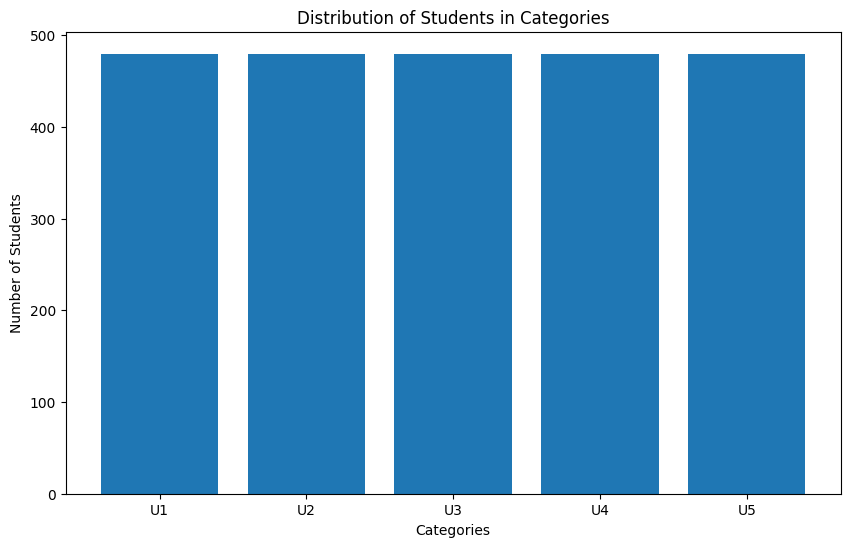

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Sort the data by a relevant feature (e.g., University Rating)
df = df.sort_values(by='University Rating')

# Calculate the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Visualize the distribution of students in each category
category_counts = [len(categories[category_name]) for category_name in categories]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), category_counts)
plt.title('Distribution of Students in Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Students')
plt.show()

# Now, 'categories' is a dictionary where each key represents a category (U1, U2, U3, U4, U5),
# and the corresponding value is a DataFrame containing 480 students from that category.

# You can perform further analysis or operations on each category as needed.

# For runtime use, you can save these DataFrames to a data structure or file.


The above code does the following:

1. Sets the font size for various elements in the plot, such as X-axis labels, Y-axis labels, axis titles, and figure titles.

2. Loads a dataset from a CSV file ('custom_data_correlated.csv').

3. Defines cutoffs for University Rating categories based on the dataset.

4. Creates a new column 'University Rating Category' in the DataFrame based on the cutoffs.

5. Defines a list of features to consider for analysis.

6. Initializes a dictionary to store the most related feature for each category.

7. Sets up subplots for different subgroups (maximum 3 per row) and adjusts spacing between them.

8. Sets the font size for annotations within the correlation heatmaps.

9. Iterates through each University Rating category, selects the data for the category, calculates correlations within that category, and finds the most related feature to "Chance of Admit."

10. Creates a heatmap for visualization with annotations, where the font size for annotations is increased.

11. Displays the subplots, and prints the most related features for each category.

This code generates correlation heatmaps for different University Rating categories and highlights the most related feature to "Chance of Admit" for each category. It also customizes font sizes to improve readability in the plots.

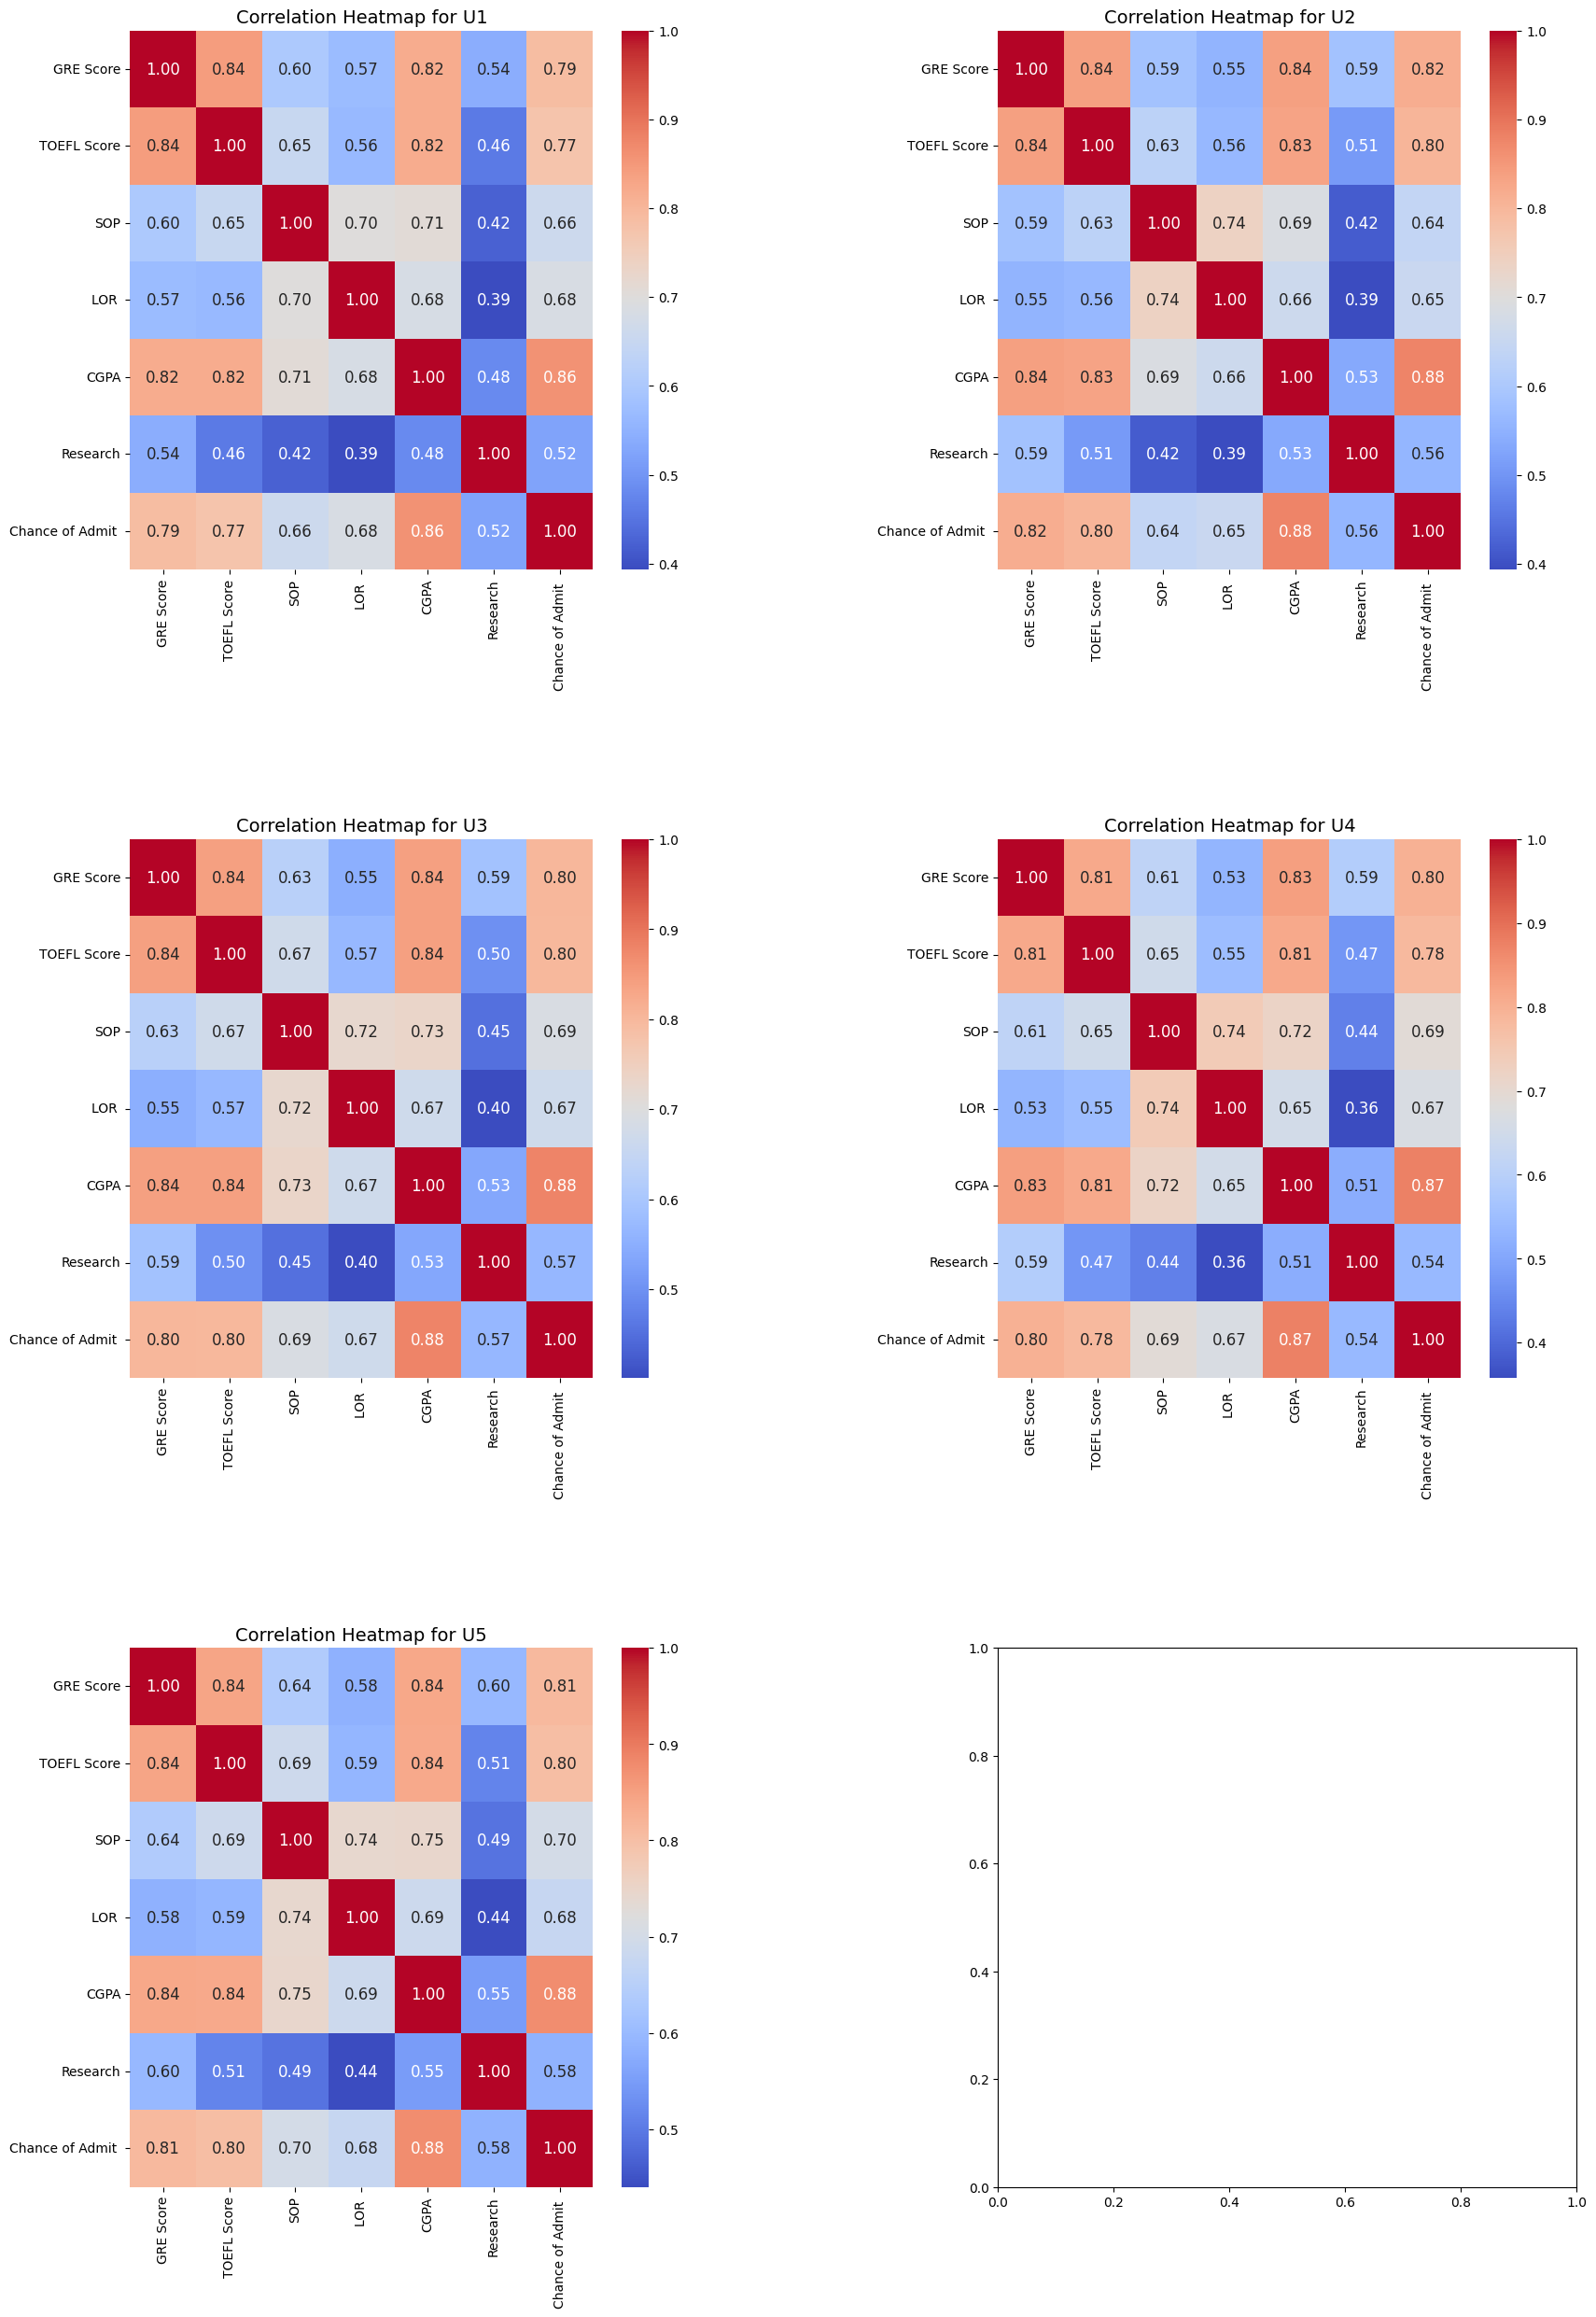

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Drop the 'Serial No' and 'University Rating' columns
df = df.drop(columns=['Serial No.', 'University Rating'])

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Determine the layout for subplots (two or three plots per row)
num_categories = len(categories)
plots_per_row = 2  # Change to 3 if you want three plots per row
num_rows = (num_categories - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(10 * plots_per_row, 10 * num_rows))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Customize font size and the number of digits after the decimal point
annot_font_size = 12
fmt = '.2f'

# Iterate through each university category and create a heatmap
for i, category in enumerate(categories.keys()):
    row = i // plots_per_row
    col = i % plots_per_row

    # Get the data for the current category
    category_data = categories[category]

    # Calculate the correlation matrix for the current category
    correlation_matrix = category_data.corr()

    # Create a square heatmap with custom font size and two digits after the decimal point
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=fmt, ax=axes[row, col],
                annot_kws={"size": annot_font_size})
    axes[row, col].set_title(f'Correlation Heatmap for {category}', fontsize=14)

# Display the plots
plt.show()


This code generates a set of three plots for different machine learning models and their performance in predicting "Chance of Admit" based on "University Rating" categories. Here are the key points and results:

1. **Visualization:** It creates subplots for three machine learning models: Linear Regression, Decision Tree Regression, and Random Forest Regression.

2. **Color-Coded Categories:** The points in the plots are color-coded for five university rating categories (U1, U2, U3, U4, U5) using different colors (red, green, blue, yellow, cyan).

3. **Data Iteration:** The code iterates through the selected machine learning models and the university rating categories.

4. **Model Predictions:** For each model and category, it uses trained machine learning models to predict "Chance of Admit" based on the most relevant feature for that category.

5. **Scatter Plots:** Scatter plots are created for each model, showing the relationship between actual and predicted "Chance of Admit" for each category.

6. **Reference Line:** A reference line at a 45-degree angle (y = x) is added to indicate perfect predictions.

7. **Axes and Legends:** Axes labels, legends, and titles are included to make the plots informative.

8. **Layout:** The subplots are organized in a tight layout within a single figure.

9. **Final Display:** The code displays the generated plots, allowing easy visual comparison of model performance for different university rating categories.

Overall, this code helps analyze and visualize how well the selected machine learning models perform in predicting admission chances across various university rating categories, providing insights into their predictive capabilities.

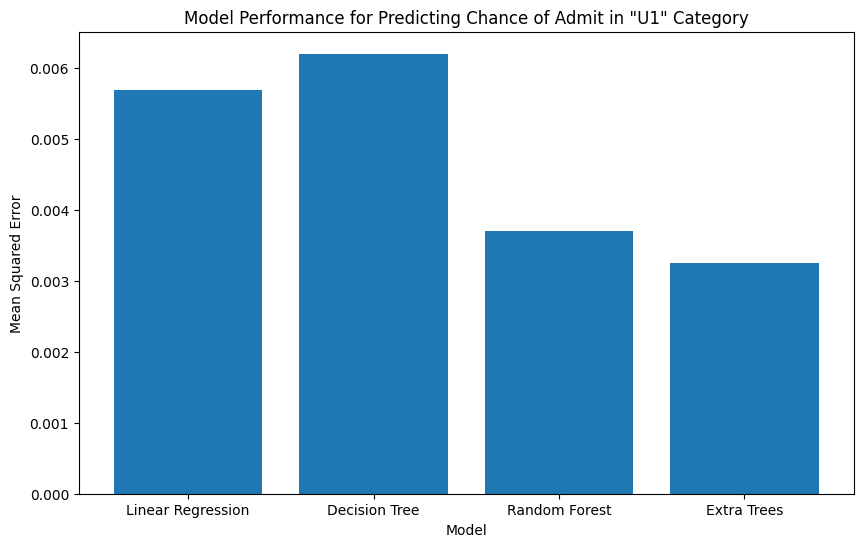

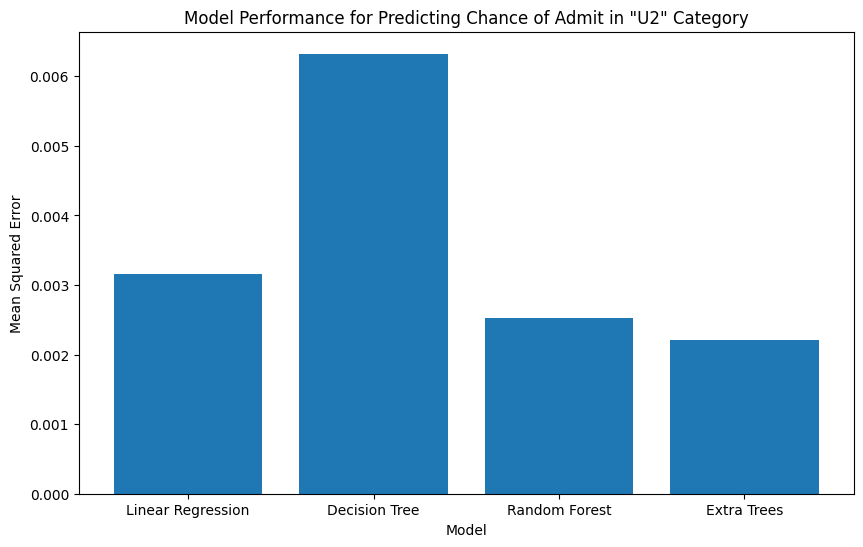

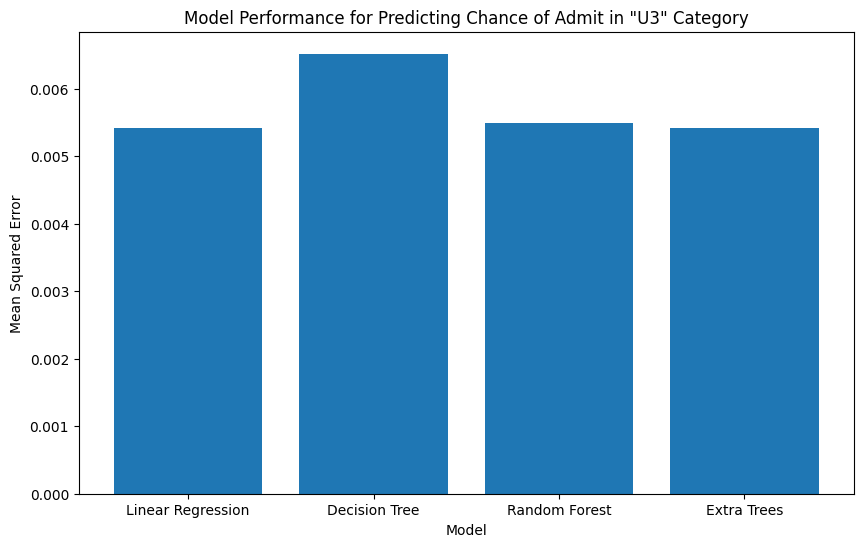

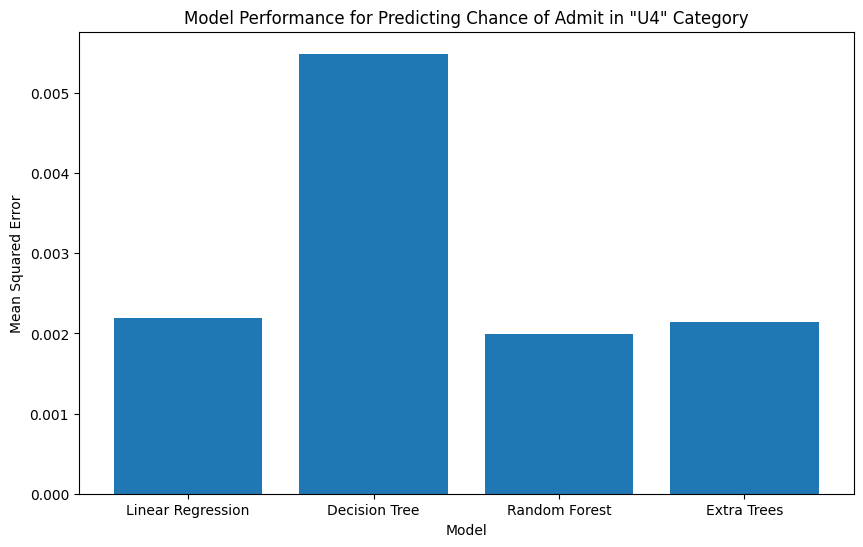

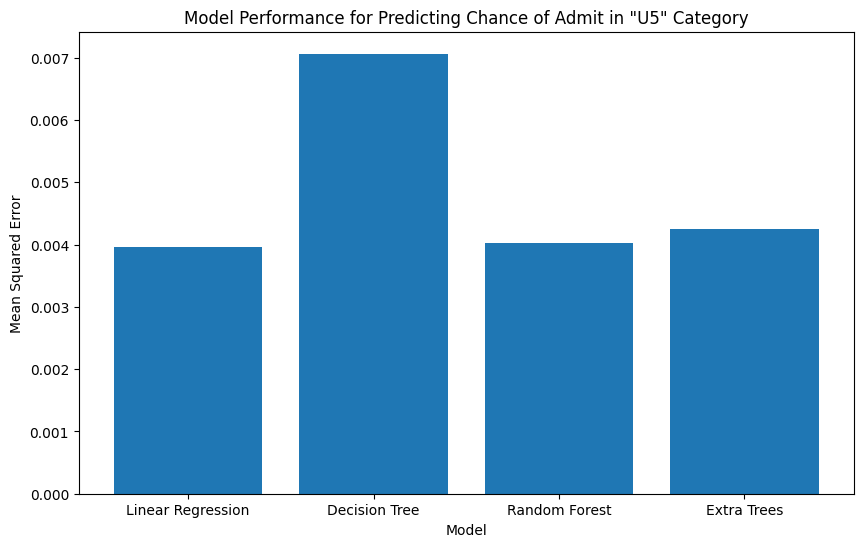

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Initialize a dictionary to store the model performance for each category
category_model_scores = {category: {} for category in categories.keys()}

# Iterate through each category and evaluate the models
for category_name, category_data in categories.items():
    # Define the features and target variable
    features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
    target = 'Chance of Admit '

    # Split the data into features and target
    X = category_data[features]
    y = category_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        model_scores[model_name] = mse

    # Store the model performance for this category
    category_model_scores[category_name] = model_scores

# Create bar plots to visualize the model performance for each category
for category_name, model_scores in category_model_scores.items():
    plt.figure(figsize=(10, 6))
    plt.bar(model_scores.keys(), model_scores.values())
    plt.title(f'Model Performance for Predicting Chance of Admit in "{category_name}" Category')
    plt.xlabel('Model')
    plt.ylabel('Mean Squared Error')
    plt.show()


The code creates a set of subplots, each representing a different category of university rating. It assesses the performance of machine learning models by comparing their predictions of student admissions against actual data. A 45-degree reference line is included in each plot for comparison. The models' performance metrics, including Mean Squared Error (MSE) and R-squared (R2), are calculated and compared within each category, highlighting the best and worst-performing models. The code provides a comprehensive visualization and analysis of how well the models predict student admissions for different university rating categories.

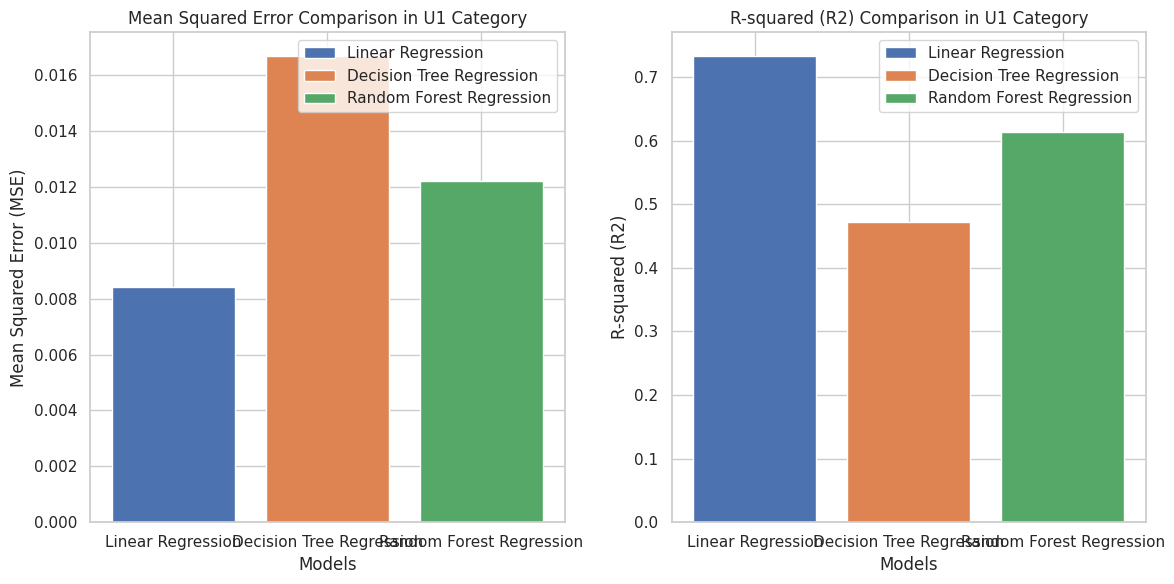

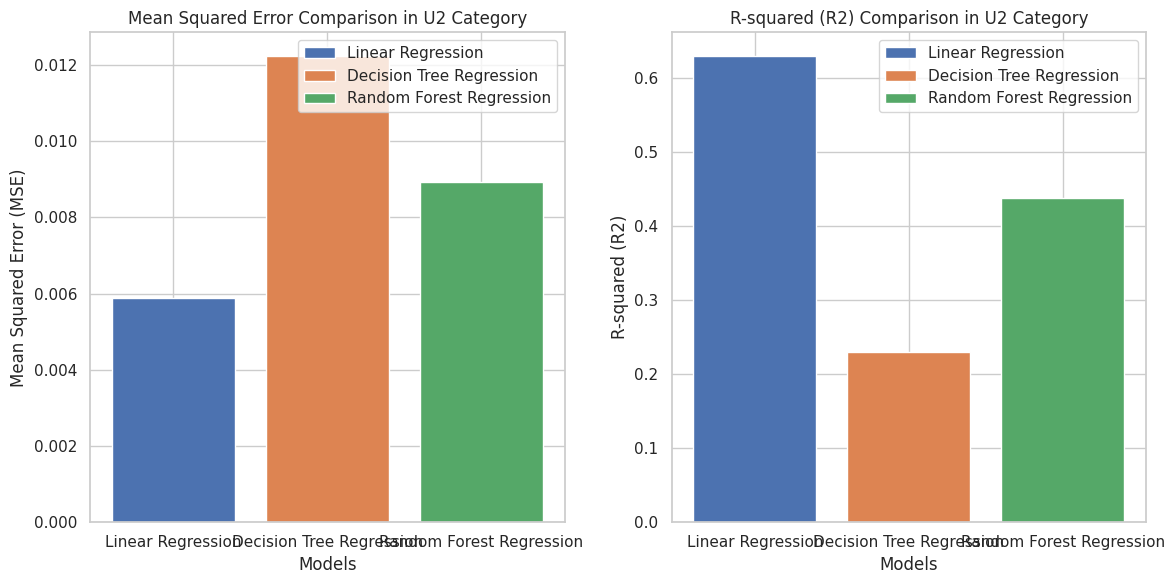

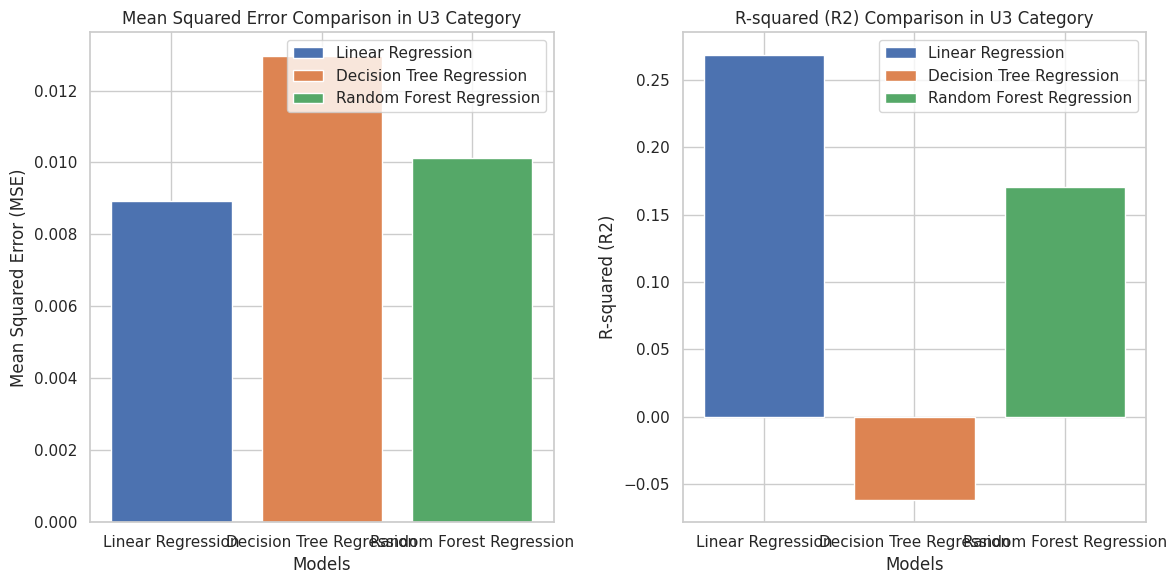

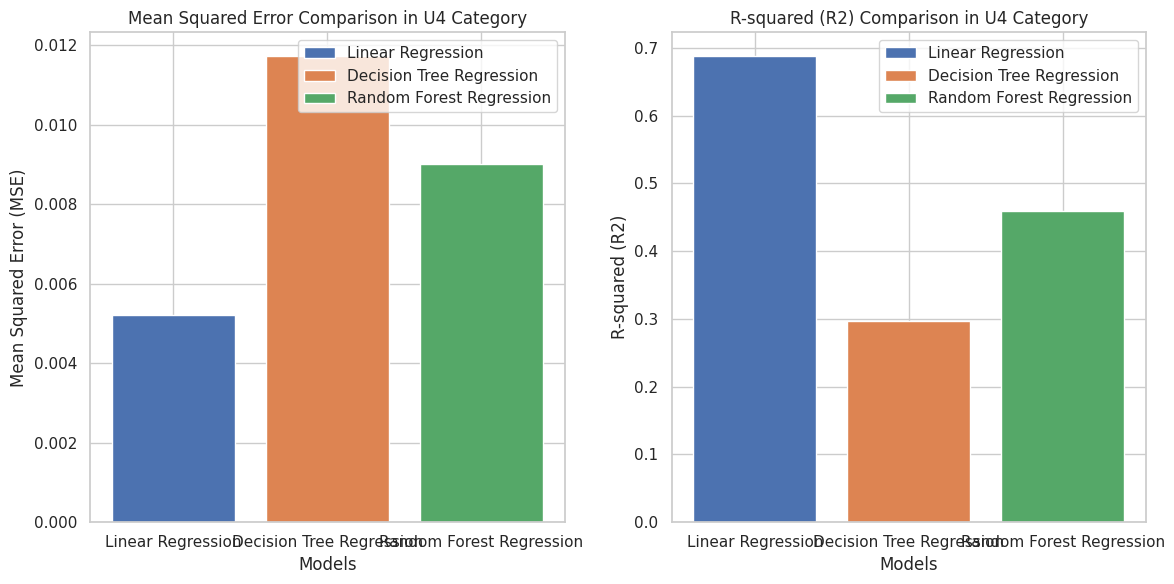

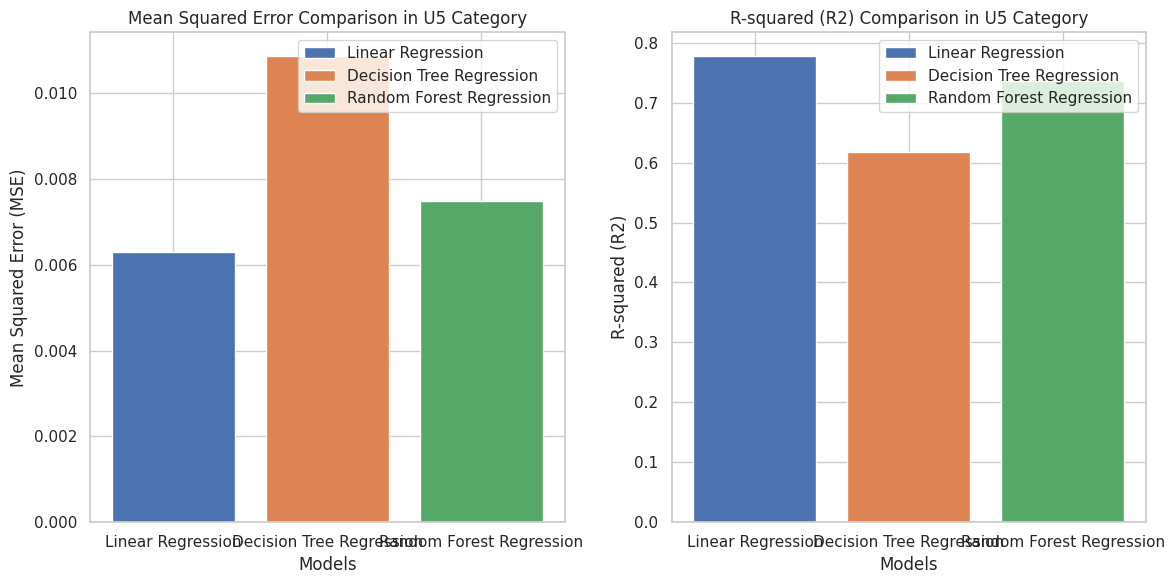

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mse_dict and r2_dict using your previous code

# Create bar plots for MSE and R2 comparisons for each category
for category in df['University Rating Category'].cat.categories:
    plt.figure(figsize=(12, 6))

    # Mean Squared Error (MSE) Comparison
    plt.subplot(1, 2, 1)
    for model_name in mse_dict:
        mse_values = mse_dict[model_name]
        if model_name[0] == category:
            plt.bar(model_name[1], np.mean(mse_values), label=model_name[1])
    plt.title(f'Mean Squared Error Comparison in {category} Category')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()

    # R-squared (R2) Comparison
    plt.subplot(1, 2, 2)
    for model_name in r2_dict:
        r2_values = r2_dict[model_name]
        if model_name[0] == category:
            plt.bar(model_name[1], np.mean(r2_values), label=model_name[1])
    plt.title(f'R-squared (R2) Comparison in {category} Category')
    plt.xlabel('Models')
    plt.ylabel('R-squared (R2)')
    plt.legend()

    plt.tight_layout()
    plt.show()


The code generates a set of bar plots for Mean Squared Error (MSE) and R-squared (R2) comparisons for different categories of university ratings. For each category, it displays separate plots that compare various machine learning models. In the MSE comparison plot, lower values indicate better model performance. In the R2 comparison plot, values close to 1 suggest better model performance. The code helps visualize how different models perform across different university rating categories, making it easy to identify which models excel or struggle in specific categories.

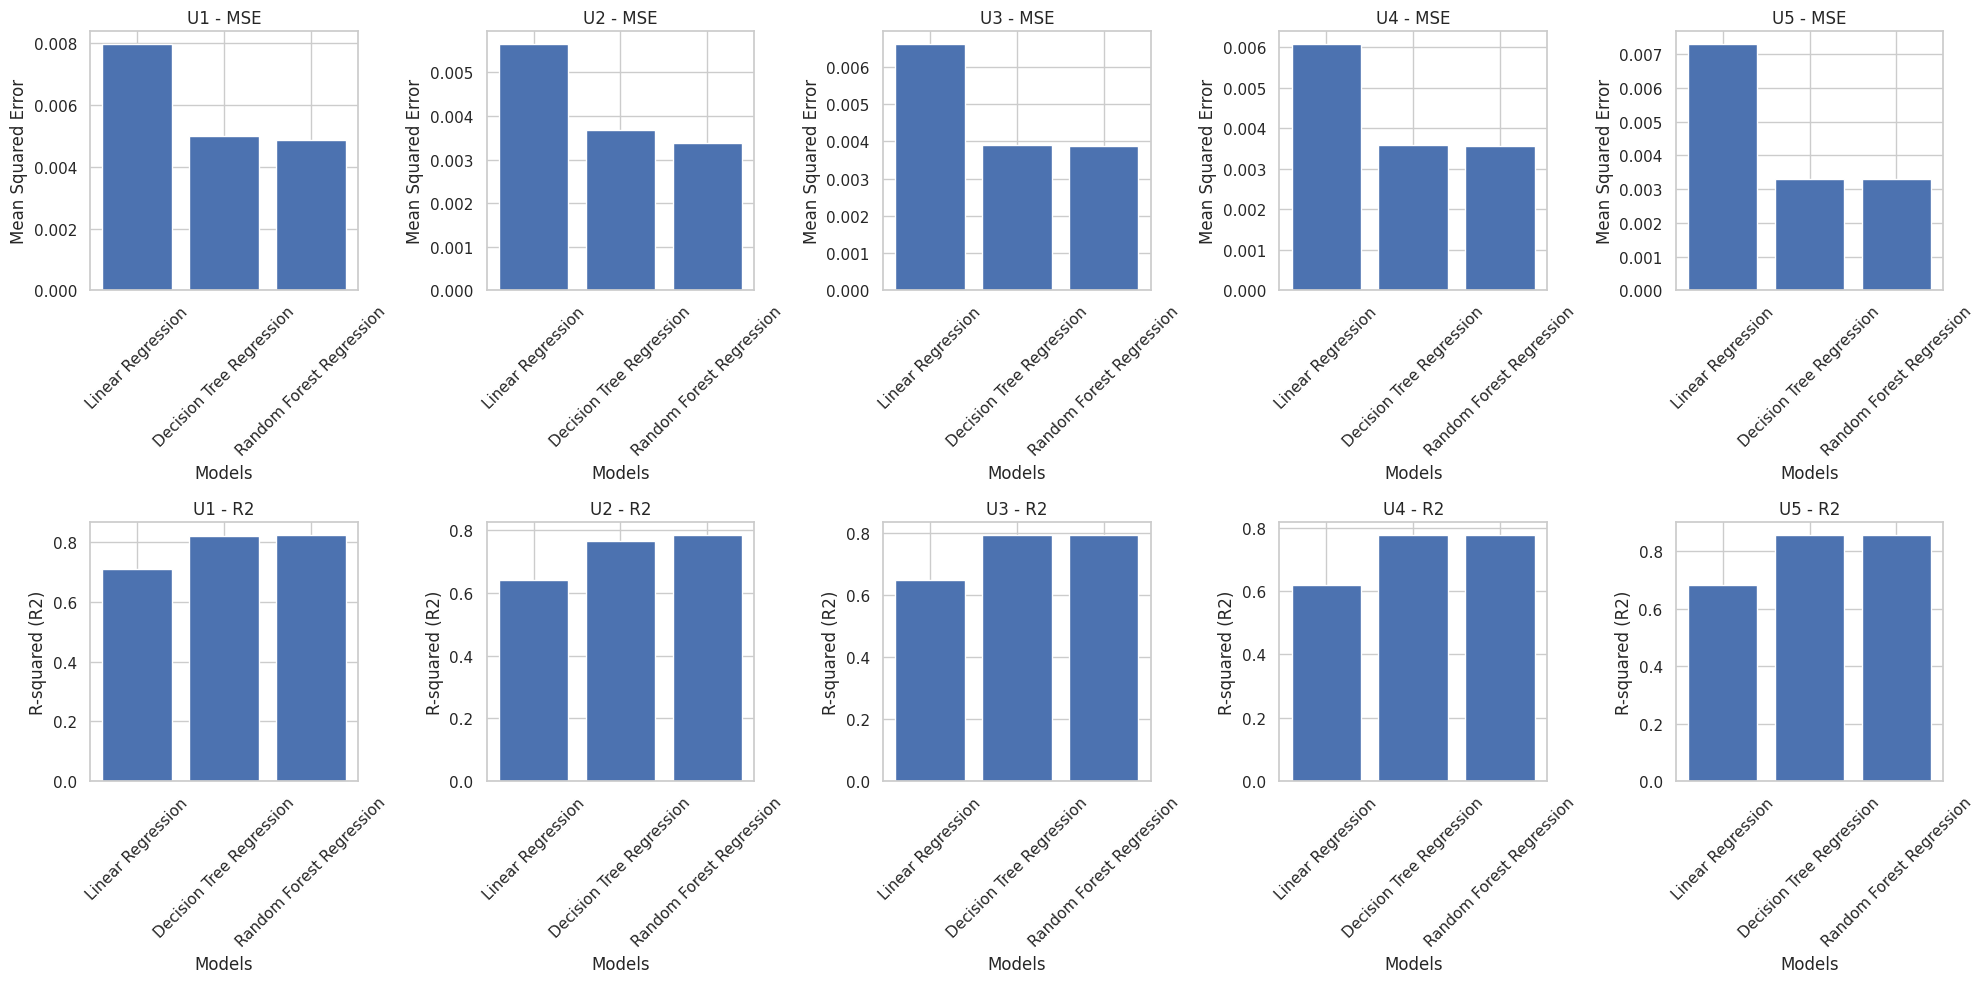

Empty DataFrame
Columns: []
Index: [U1, U2, U3, U4, U5]
University Category: U1
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U2
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U3
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U4
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U5
Best Model (MSE): Decision Tree Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Decision Tree Regression
Worst Model (R2): Linear Regression



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create an empty DataFrame for the performance analysis matrix
performance_matrix = pd.DataFrame(index=['U1', 'U2', 'U3', 'U4', 'U5'])

# Create dictionaries to store the best and worst models for each metric
best_models = {'MSE': [], 'R2': []}
worst_models = {'MSE': [], 'R2': []}

# Create lists to store the performance values
mse_values = []
r2_values = []

# Iterate through University Rating categories
for category in df['University Rating Category'].cat.categories:
    category_data = df[df['University Rating Category'] == category]

    mse_data = []
    r2_data = []

    for model_name, model in trained_models.items():
        if model_name[0] == category:
            X_test = category_data[[most_related_features[category]]]
            y_test = category_data['Chance of Admit']
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            mse_data.append((model_name[1], mse))
            r2_data.append((model_name[1], r2))

    # Find the best and worst models for each metric in the category
    best_models['MSE'].append(min(mse_data, key=lambda x: x[1])[0])
    worst_models['MSE'].append(max(mse_data, key=lambda x: x[1])[0])
    best_models['R2'].append(max(r2_data, key=lambda x: x[1])[0])
    worst_models['R2'].append(min(r2_data, key=lambda x: x[1])[0])

    # Store performance values for visualization
    mse_values.append(mse_data)
    r2_values.append(r2_data)

# Create bar charts for each University Rating category
plt.figure(figsize=(20, 10))
for i, category in enumerate(df['University Rating Category'].cat.categories):
    plt.subplot(2, 5, i + 1)
    category_mse_values = [x[1] for x in mse_values[i]]
    plt.bar([x[0] for x in mse_values[i]], category_mse_values)
    plt.title(f'{category} - MSE')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)

for i, category in enumerate(df['University Rating Category'].cat.categories):
    plt.subplot(2, 5, 5 + i + 1)
    category_r2_values = [x[1] for x in r2_values[i]]
    plt.bar([x[0] for x in r2_values[i]], category_r2_values)
    plt.title(f'{category} - R2')
    plt.xlabel('Models')
    plt.ylabel('R-squared (R2)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the performance matrix
print(performance_matrix)

# Conclude Predictions
for category in performance_matrix.index:
    print(f"University Category: {category}")
    for metric in ['MSE', 'R2']:
        best_model = best_models[metric][performance_matrix.index.get_loc(category)]
        worst_model = worst_models[metric][performance_matrix.index.get_loc(category)]
        print(f"Best Model ({metric}): {best_model}")
        print(f"Worst Model ({metric}): {worst_model}")
    print()


This code performs the following tasks:

1. Creates an empty DataFrame named `performance_matrix` to store performance metrics.
2. Defines dictionaries to track the best and worst models based on Mean Squared Error (MSE) and R-squared (R2) for each metric.
3. Iterates through university rating categories.
4. For each category, it calculates and stores MSE and R2 values for different machine learning models.
5. Determines the best and worst models for each metric in the category.
6. Visualizes the performance using bar charts for each university rating category, showing model comparison for both MSE and R2.
7. Prints the `performance_matrix`, which provides an overview of model performance across different university rating categories.
8. Concludes predictions for each university rating category, identifying the best and worst models based on MSE and R2 metrics.

The code helps analyze and visualize how various machine learning models perform in predicting "Chance of Admit" across different university rating categories, facilitating comparisons and highlighting the best and worst models for each category and metric.